# Árvores II - Tarefa I

![image.png](attachment:f65bd82d-aa56-4cf2-8030-bb758771f332.png)  
[fonte](https://momentum.org/programs-services/manage-your-money/savings-app/pxfuel-creative-commons-zero-cc0-iphone-smartphone-cell-phone-mobile-technology-texting/)

Neste exercício vamos trabalhar com a base de dados de identificação de atividade humana com smartphones. Smartphones possuem acelerômetro e giroscópio, que registram dados de aceleração e giro nos eixos X, Y e Z, com frequencia de 50 Hz (ou seja, 50 registros por segundo). Os dados foram agrupados a medidas de 0.3 Hz, calculando-se variáveis derivadas como aceleração mínima, máxima, média etc por eixo no período agrupado de tempo, resultando em 561 variáveis que podem ser lidas nas bases disponíveis.

A base é oriunda de um experimento, em que os indivíduos realizavam uma de seis atividades corriqueiras:
- andando
- subindo escada
- descendo escada
- parado
- sentado
- deitado

O objetivo é classificar a atividade humana com base nos dados do acelerômetro e giroscópio do celular.

### 1. Carregar a base

Sua primeira atividade é carregar a base.

Ela está disponível neste link:
https://archive.ics.uci.edu/ml/datasets/human+activity+recognition+using+smartphones

dados https://archive.ics.uci.edu/ml/machine-learning-databases/00240/  
dataset.names https://archive.ics.uci.edu/ml/machine-learning-databases/00240/UCI%20HAR%20Dataset.names  
UCI HAR Dataset.zip https://archive.ics.uci.edu/ml/machine-learning-databases/00240/UCI%20HAR%20Dataset.zip

Você vai encontrar os seguintes arquivos:

- **features.txt:** contém a lista com os nomes das variáveis
- **features_info.txt:** contém a descrição das variáveis
- **README.txt:** contém uma descrição do estudo e das bases
- **activity_labels:** contém o código da atividade (inteiro entre 1 e 6) e a descrição
- **subject_train.txt:** uma lista indicando que registro pertence a que indivíduo na base de treino
- **X_train.txt:** as *features* (ou variáveis explicativas) da base de testes. Cada linha representa um registro das informações de um indivíduo em um intervalo de tempo de aproximadamente 1/0.3 segundo. As medidas estão em ordem temporal dentro do estudo, e o indivíduo que originou a medida está identificado na base subject_train.txt.
- **y_train.txt:** Possui o mesmo número de linhas que X_test. Contém um número de 1 a 6 indicando a atividade que estava sendo realizada por aquele registro na base de treino.
- **subject_test.txt:** uma lista indicando que registro pertence a que indivíduo na base de teste
- **X_test.txt:** as *features* (ou variáveis explicativas) da base de testes. Cada linha representa um registro das informações de um indivíduo em um intervalo de tempo de aproximadamente 1/0.3 segundo. As medidas estão em ordem temporal dentro do estudo, e o indivíduo que originou a medida está identificado na base subject_test.txt.
- **y_test.txt:** Possui o mesmo número de linhas que X_train. Contém um número de 1 a 6 indicando a atividade que estava sendo realizada por aquele registro na base de teste.

Carregue as bases:

1. Faça o download dos arquivos.
2. Carregue a base ```features.txt``` em uma *Series* (por exemplo usando o comando ```pd.read_csv()```.
3. Carregue a base subject_train.txt em uma *Series*
4. Carregue a base X_train.txt
    1. Faça com que as colunas deste *dataframe* tenham os nomes indicados em ```features.txt```
    2. Sem alterar a ordem dos *dataframes*, coloque o indicador do indivíduo lido em ```subject_train.txt``` como uma variável a mais neste *dataframe***
    3. Faça com que este *dataframe* tenha um índice duplo, composto pela ordem dos dados e pelo identificador do indivíduo
5. Com a mesma lógica, carregue a base X_test
    1. Certifique-se de que tenha os nomes lidos em ```features.txt```
    2. Coloque o identificador do sujeito lido em ```subject_test.txt```
    3. Defina um índice duplo composto pela ordem do registro e o identificador do registro
6. Salve as bases em arquivos CSV para facilitar a leitura deles na terefa 2 deste módulo
7. Considere que esta base é maior que a da aula, tanto em linhas quanto em colunas. Selecione apenas as três primeiras colunas da base ('tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y' e 'tBodyAcc-mean()-Z'), para efeitos desse exercício.

**OBS:** As bases já estão divididas em treino e teste, de modo que não vamos precisar da função ```train_test_split```.

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import matplotlib.pyplot as plt

### 2. Carregue a base features.txt em uma Series (por exemplo usando o comando pd.read_csv()

In [ ]:
import pandas as pd

# Carregando o arquivo features.txt em um DataFrame
file_path = "/content/features.txt"

# Utilizando o pandas para ler o arquivo e criar um DataFrame
try:
    features_df = pd.read_csv(file_path, header=None, sep="\s+", engine="python", names=["Index", "Feature"])
except pd.errors.ParserError:
    # Se ocorrer um erro de parser, tente ajustar o separador ou outras opções
    features_df = pd.read_csv(file_path, header=None, sep="\t", engine="python", names=["Index", "Feature"])

# Exibindo as primeiras linhas do DataFrame
pd.set_option("display.max_rows", None)  # Mostrar todas as linhas
print(features_df)


### 3.Carregue a base subject_train.txt em uma Series

In [ ]:
# Caminho do arquivo subject_train.txt
file_path_subject_train = "/content/subject_train.txt"

# Carregando o arquivo subject_train.txt em uma Series
subject_train_series = pd.read_csv(file_path_subject_train, header=None, names=["Subject"]).iloc[:, 0]

# Exibindo as primeiras linhas da Series
print(subject_train_series.head())

### 4. Carregue a base X_train.txt


In [ ]:
# Caminho do arquivo X_train.txt
file_path_X_train = "/content/X_train.txt"

# Carregando o arquivo X_train.txt em um DataFrame
X_train_df = pd.read_csv(file_path_X_train, header=None, delim_whitespace=True)

# Exibindo as primeiras linhas do DataFrame
print(X_train_df.head())


a. Faça com que as colunas deste dataframe tenham os nomes indicados em features.txt

In [ ]:
# Caminho do arquivo X_train.txt
file_path_X_train = "/content/X_train.txt"

# Carregando o arquivo X_train.txt em um DataFrame
X_train_df = pd.read_csv(file_path_X_train, header=None, delim_whitespace=True)

# Caminho do arquivo features.txt
file_path_features = "/content/features.txt"

# Carregando os nomes das features do arquivo features.txt
with open(file_path_features, 'r') as file:
    feature_names = [line.strip() for line in file.readlines()]

# Atribuindo os nomes das features como colunas do DataFrame X_train_df
X_train_df.columns = feature_names

# Exibindo as primeiras linhas do DataFrame com os nomes das colunas
print(X_train_df.head())



b. Sem alterar a ordem dos dataframes, coloque o indicador do indivíduo lido em subject_train.txt como uma variável a mais neste dataframe**

In [ ]:
# Caminho do arquivo subject_train.txt
file_path_subject_train = "/content/subject_train.txt"

# Carregando o arquivo subject_train.txt em uma Series
subject_train_series = pd.read_csv(file_path_subject_train, header=None, squeeze=True, names=["Subject"])

# Adicionando a coluna de identificador do sujeito como uma variável ao DataFrame X_train_df
X_train_df["Subject"] = subject_train_series

# Exibindo as primeiras linhas do DataFrame com a nova variável
print(X_train_df.head())


c. Faça com que este dataframe tenha um índice duplo, composto pela ordem dos dados e pelo identificador do indivíduo

In [ ]:
# Adicionando a coluna de identificador do sujeito como uma variável ao DataFrame X_train_df
X_train_df["Subject"] = subject_train_series

# Configurando o índice duplo
X_train_df.set_index([X_train_df.index, "Subject"], inplace=True)

# Exibindo as primeiras linhas do DataFrame com o índice duplo
print(X_train_df.head())

# 5. Com a mesma lógica, carregue a base X_test


In [ ]:
# Função para carregar os dados e realizar as transformações necessárias
def load_data(file_path_X, file_path_subject, file_path_features):
    # Carregando os nomes das features do arquivo features.txt
    with open(file_path_features, 'r') as file:
        feature_names = [line.strip() for line in file.readlines()]

    # Carregando o arquivo X em um DataFrame
    X_df = pd.read_csv(file_path_X, header=None, delim_whitespace=True)
    X_df.columns = feature_names  # Atribuindo os nomes das features como colunas

    # Carregando o arquivo subject em uma Series
    subject_series = pd.read_csv(file_path_subject, header=None, squeeze=True, names=["Subject"])

    # Adicionando a coluna de identificador do sujeito como uma variável ao DataFrame
    X_df["Subject"] = subject_series

    # Configurando o índice duplo
    X_df.set_index([X_df.index, "Subject"], inplace=True)

    return X_df

# Caminhos dos arquivos
file_path_X_train = "/content/X_train.txt"
file_path_subject_train = "/content/subject_train.txt"
file_path_features = "/content/features.txt"

file_path_X_test = "/content/X_test.txt"
file_path_subject_test = "/content/subject_test.txt"

# Carregando os dados de treinamento e teste
X_train_df = load_data(file_path_X_train, file_path_subject_train, file_path_features)
X_test_df = load_data(file_path_X_test, file_path_subject_test, file_path_features)

# Exibindo as primeiras linhas dos DataFrames
print("Dados de Treinamento:")
print(X_train_df.head())

print("\nDados de Teste:")
print(X_test_df.head())


# 6. Salve as bases em arquivos CSV para facilitar a leitura deles na terefa 2 deste módulo

In [ ]:
# Função para carregar os dados e realizar as transformações necessárias
def load_data(file_path_X, file_path_subject, file_path_features):
    # Carregando os nomes das features do arquivo features.txt
    with open(file_path_features, 'r') as file:
        feature_names = [line.strip() for line in file.readlines()]

    # Carregando o arquivo X em um DataFrame
    X_df = pd.read_csv(file_path_X, header=None, delim_whitespace=True)
    X_df.columns = feature_names  # Atribuindo os nomes das features como colunas

    # Carregando o arquivo subject em uma Series
    subject_series = pd.read_csv(file_path_subject, header=None, squeeze=True, names=["Subject"])

    # Adicionando a coluna de identificador do sujeito como uma variável ao DataFrame
    X_df["Subject"] = subject_series

    # Configurando o índice duplo
    X_df.set_index([X_df.index, "Subject"], inplace=True)

    return X_df

# Caminhos dos arquivos
file_path_X_train = "/content/X_train.txt"
file_path_subject_train = "/content/subject_train.txt"
file_path_features = "/content/features.txt"

file_path_X_test = "/content/X_test.txt"
file_path_subject_test = "/content/subject_test.txt"

# Carregando os dados de treinamento e teste
X_train_df = load_data(file_path_X_train, file_path_subject_train, file_path_features)
X_test_df = load_data(file_path_X_test, file_path_subject_test, file_path_features)

# Salvando os DataFrames em arquivos CSV
X_train_df.to_csv("/content/X_train_processed.csv")
X_test_df.to_csv("/content/X_test_processed.csv")


# 7. Considere que esta base é maior que a da aula, tanto em linhas quanto em colunas. Selecione apenas as três primeiras colunas da base ('tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y' e 'tBodyAcc-mean()-Z'), para efeitos desse exercício.

In [80]:
# Removendo índices dos nomes das colunas
X_train_df.columns = [col.split()[-1] for col in X_train_df.columns]
X_test_df.columns = [col.split()[-1] for col in X_test_df.columns]

# Selecionando apenas as três primeiras colunas dos DataFrames
X_train_subset = X_train_df[['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z']]
X_test_subset = X_test_df[['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z']]


### 2. Ajustar uma árvore de decisão

- 2.1 ajuste uma árvore de decisão com número mínimo de observações por folha = 20. Certifique-se de que você esteja utilizando apenas as 3 variáveis indicadas no exercício anterior.
- 2.2 Calcule os ccp_alphas. Como feito em aula, certifique-se de que todos os valores são positivos, e selecione apenas valores únicos.
- 2.3 Considere que vamos fazer uma árvore para cada valor de ```ccp_alpha```. Para ter um pouco mais de velocidade, crie uma coleção de dados com os ```ccp_alphas```, considerando apenas 1 a cada 5 valores. Dica: utilize o slicing do tipo ```array[::5]``` para isto. Caso se sinta seguro, fique à vontade para utilizar mais valores de ```ccp_alpha```.

In [86]:
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Number of NaN values in X_train:", X_train.isna().sum().sum())
print("Number of NaN values in y_train:", y_train.isna().sum())


Shape of X_train: (0, 561)
Shape of y_train: (0,)
Number of NaN values in X_train: 0.0
Number of NaN values in y_train: 0


<ipython-input-94-fbf03acfa227>:45: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  subject_train_series = pd.read_csv(file_path_subject_train, header=None, squeeze=True, names=["Subject"]).squeeze()
<ipython-input-94-fbf03acfa227>:20: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  subject_series = pd.read_csv(file_path_subject, header=None, squeeze=True, names=["Subject"]).squeeze()
<ipython-input-94-fbf03acfa227>:54: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  y_train_series = pd.read_csv(file_path_labels_train, header=None, squeeze=True, names=["Label"]).squeeze()


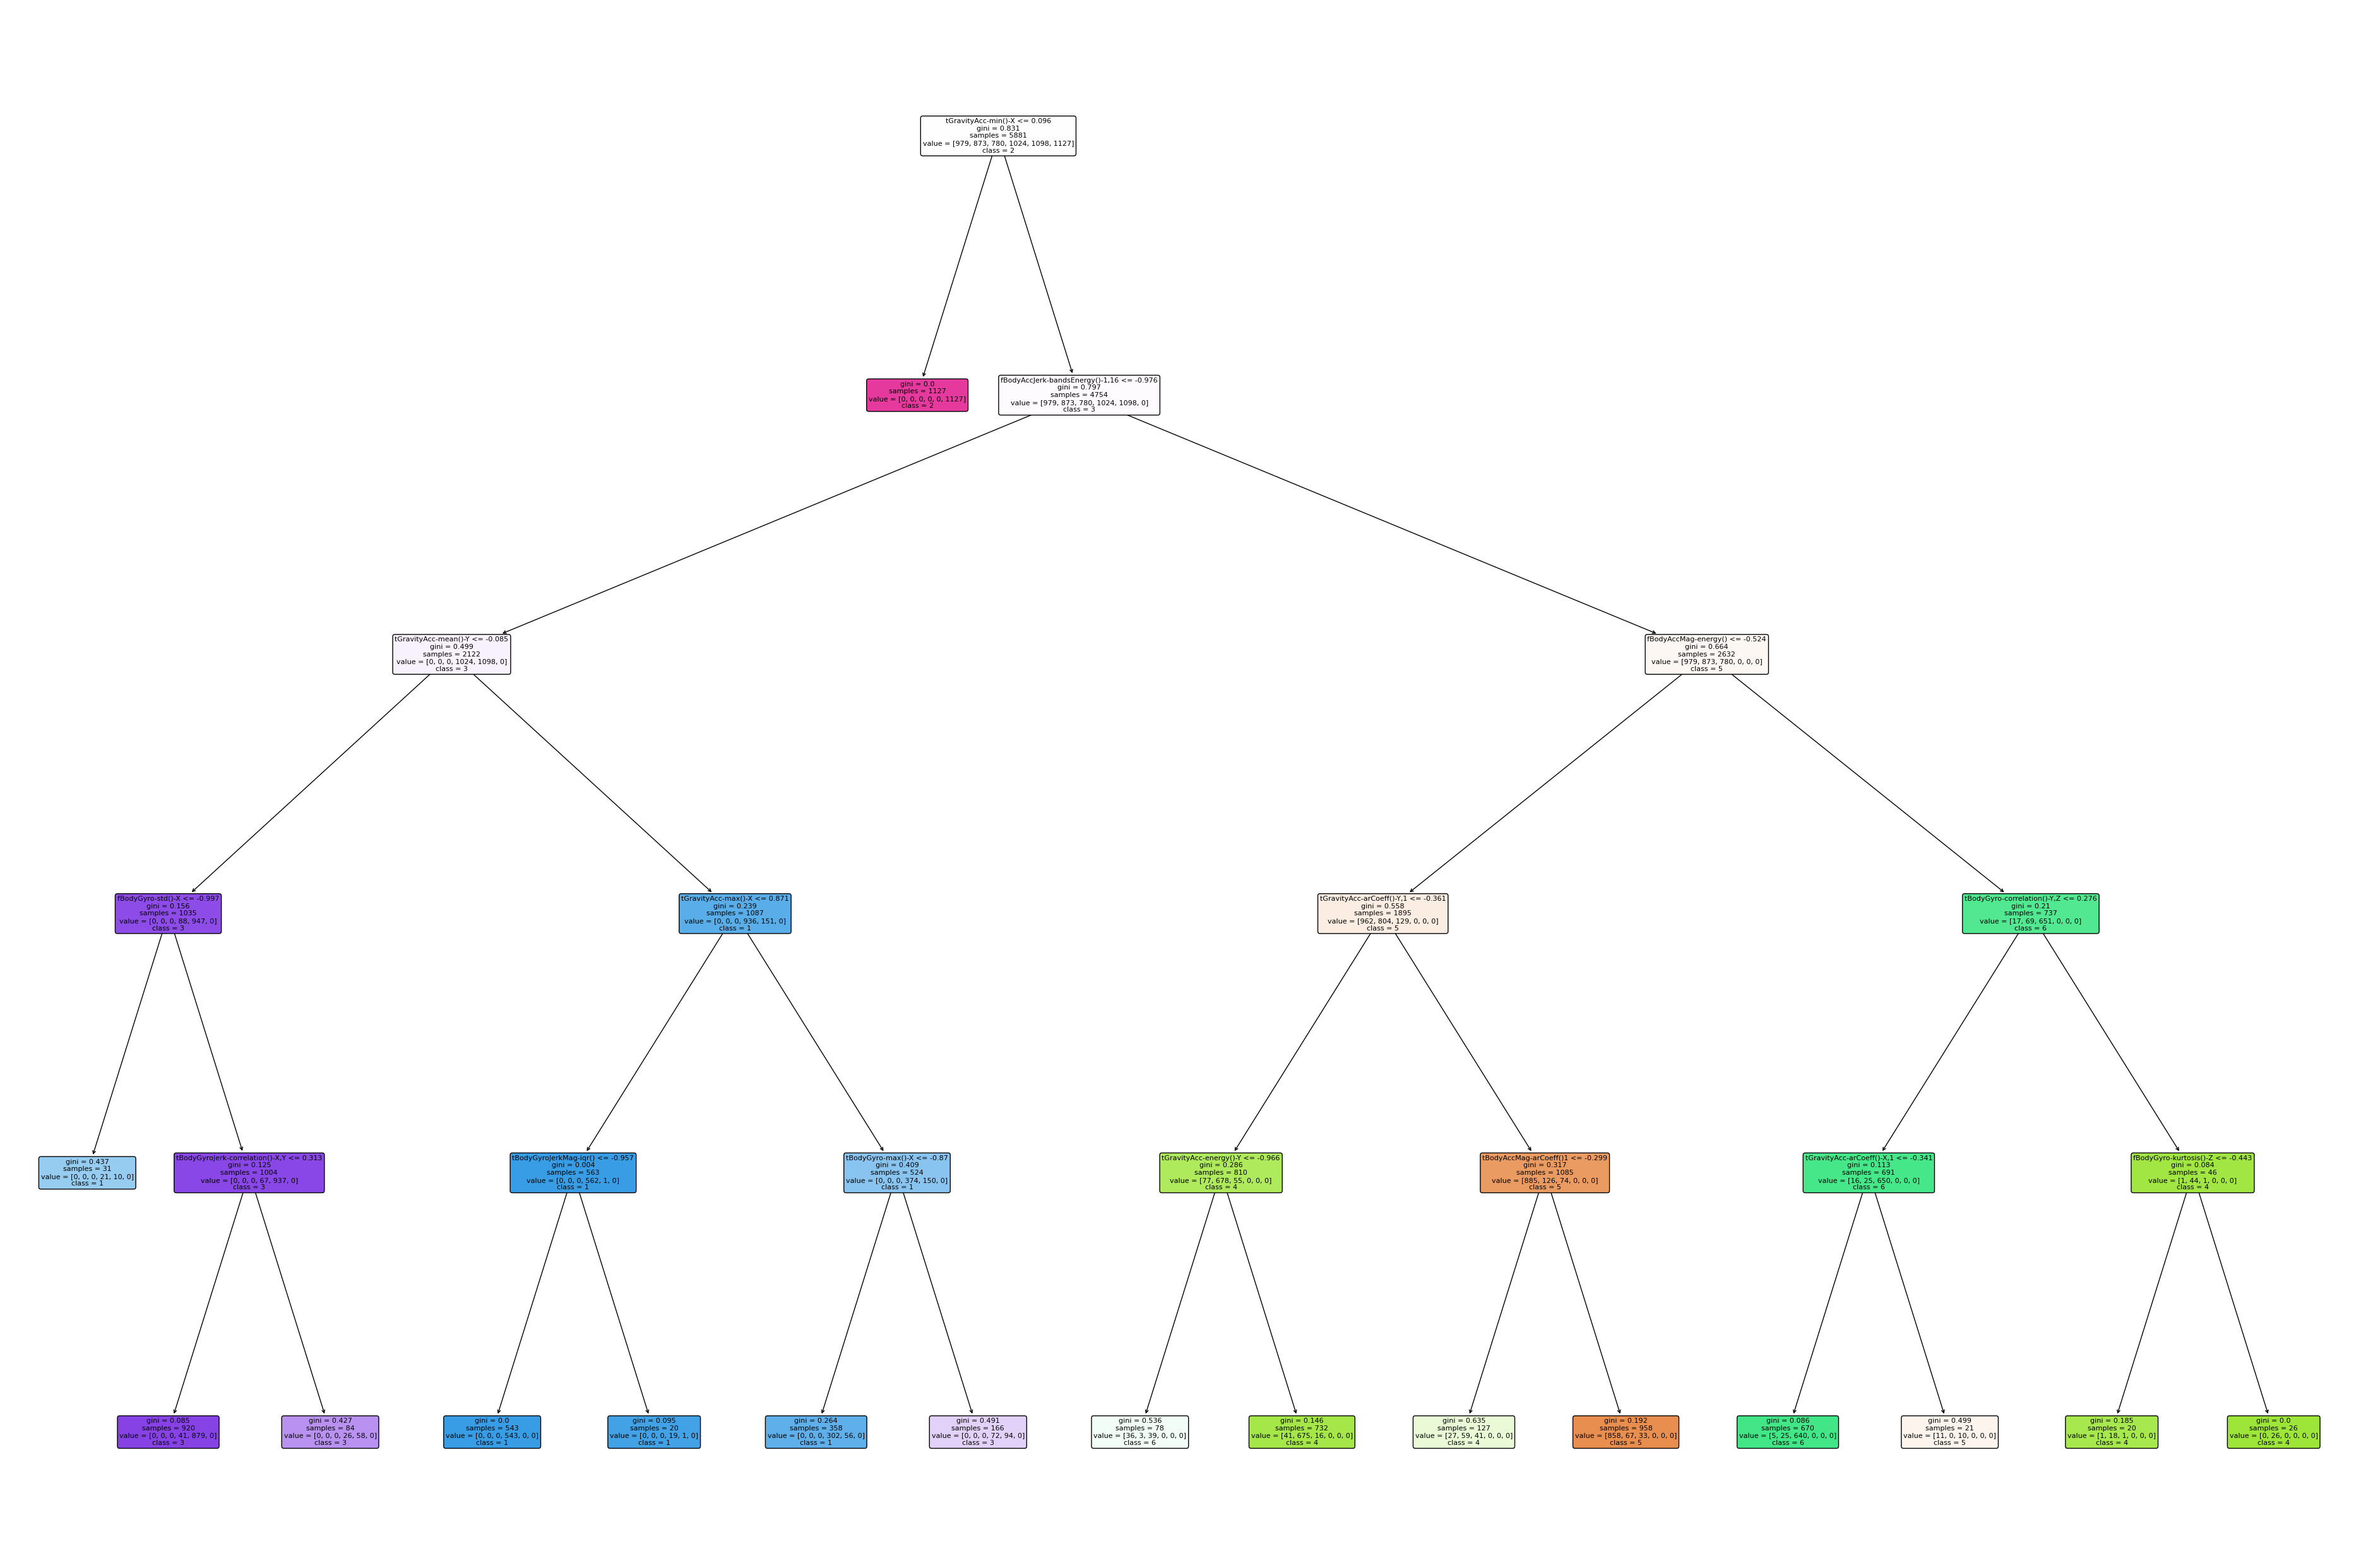

In [94]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Função para carregar as features
def load_features(file_path_features):
    try:
        features_df = pd.read_csv(file_path_features, header=None, sep="\s+", engine="python", names=["Index", "Feature"])
    except pd.errors.ParserError:
        features_df = pd.read_csv(file_path_features, header=None, sep="\t", engine="python", names=["Index", "Feature"])
    return features_df

# Função para carregar os dados
def load_data(file_path_X, file_path_subject, file_path_features, file_path_labels=None):
    # Carregar features
    features_df = load_features(file_path_features)

    # Carregar dados do sujeito
    subject_series = pd.read_csv(file_path_subject, header=None, squeeze=True, names=["Subject"]).squeeze()

    # Carregar dados X
    X_df = pd.read_csv(file_path_X, header=None, delim_whitespace=True)
    X_df.columns = features_df["Feature"].values

    # Adicionar a coluna de identificador do sujeito ao DataFrame
    X_df["Subject"] = subject_series

    # Configurar o índice duplo
    X_df.set_index([X_df.index, "Subject"], inplace=True)

    # Carregar dados Y (opcional)
    if file_path_labels:
        y_series = pd.read_csv(file_path_labels, header=None, squeeze=True, names=["Label"]).squeeze()
        return X_df, y_series
    else:
        return X_df

# 2. Carregando o arquivo features.txt em um DataFrame
file_path_features = "/content/features.txt"
features_df = load_features(file_path_features)

# 3. Carregando a base subject_train.txt em uma Series
file_path_subject_train = "/content/subject_train.txt"
subject_train_series = pd.read_csv(file_path_subject_train, header=None, squeeze=True, names=["Subject"]).squeeze()

# 4. Carregando a base X_train.txt
file_path_X_train = "/content/X_train.txt"
X_train_df = load_data(file_path_X_train, file_path_subject_train, file_path_features)

# 5. Carregando a base y_train.txt (opcional, se disponível)
file_path_labels_train = "/content/y_train.txt"
if file_path_labels_train:
    y_train_series = pd.read_csv(file_path_labels_train, header=None, squeeze=True, names=["Label"]).squeeze()
    X_train_df['Label'] = y_train_series

# 6. Salvando as bases em arquivos CSV
X_train_df.to_csv("/content/X_train_processed.csv")

# 7. Selecionando apenas as três primeiras colunas das bases
X_train_subset = X_train_df.iloc[:, :3]

# 8. Ajustando uma árvore de decisão
# Removendo a coluna 'Label' do DataFrame antes de treinar a árvore
if file_path_labels_train:
    X_train_df.drop('Label', axis=1, inplace=True)

# Separando os dados de treinamento em conjunto de treino e conjunto de validação
X_train, X_val, y_train, y_val = train_test_split(X_train_df, y_train_series, test_size=0.2, random_state=42)

# Ajustando uma árvore de decisão com número mínimo de observações por folha = 20
tree = DecisionTreeClassifier(min_samples_leaf=20, random_state=42, max_depth=5)
tree.fit(X_train, y_train)

# Visualizando a árvore
plt.figure(figsize=(48, 32))
unique_labels = y_train_series.unique()
class_names = [str(label) for label in unique_labels]  # Converte os rótulos para strings
plot_tree(tree, filled=True, feature_names=X_train_df.columns, class_names=class_names, rounded=True)
plt.show()


### 3. Desempenho da árvore por ccp_alpha

- 3.1: Rode uma árvore para cada ```ccp_alpha```, salvando cada árvore em uma lista
- 3.2: Calcule a acurácia de cada árvore na base de treinamento e de teste
- 3.3: Monte um gráfico da acurácia em função do ```ccp_alpha``` na base de validação e na base de teste
- 3.4: Selecione a melhor árvore como sendo aquela que possui melhor acurácia na base de teste
- 3.5: Qual a melhor acurácia que se pode obter com estas três variáveis?

**Dica:** utilize a estrutura do notebook apresentado em aula.  
**Dica 2:** meça o tempo com a função mágica ```%%time``` na primeira linha da célula.  
**Sugestão:** caso fique confortável com o tempo de execução, faça a busca pelo melhor ```ccp_alpha``` com mais iterações.  
**Sugestão 2:** caso fique confortável com o tempo de execução, tente inserir uma ou mais variáveis adicionais e veja se consegue aumentar a acurácia.

In [98]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Lista para armazenar as árvores
trees = []

# Valores de ccp_alpha para iterar
ccp_alphas = [0.0, 0.01, 0.02, 0.03, 0.04, 0.05]  # Substitua pelos valores desejados

# Iterar sobre os valores de ccp_alpha
for ccp_alpha in ccp_alphas:
    # Criar a árvore de decisão com o valor específico de ccp_alpha
    tree = DecisionTreeClassifier(ccp_alpha=ccp_alpha, random_state=42)

    # Ajustar a árvore com os dados de treinamento
    tree.fit(X_train, y_train)

    # Adicionar a árvore à lista
    trees.append(tree)


In [99]:
from sklearn.metrics import accuracy_score

# Lista para armazenar as acurácias
train_accuracies = []
test_accuracies = []

# Iterar sobre as árvores
for tree in trees:
    # Prever os rótulos para a base de treinamento e teste
    y_train_pred = tree.predict(X_train)
    y_test_pred = tree.predict(X_val)  # Supondo que X_val seja a base de validação

    # Calcular e armazenar as acurácias
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_val, y_test_pred)

    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)


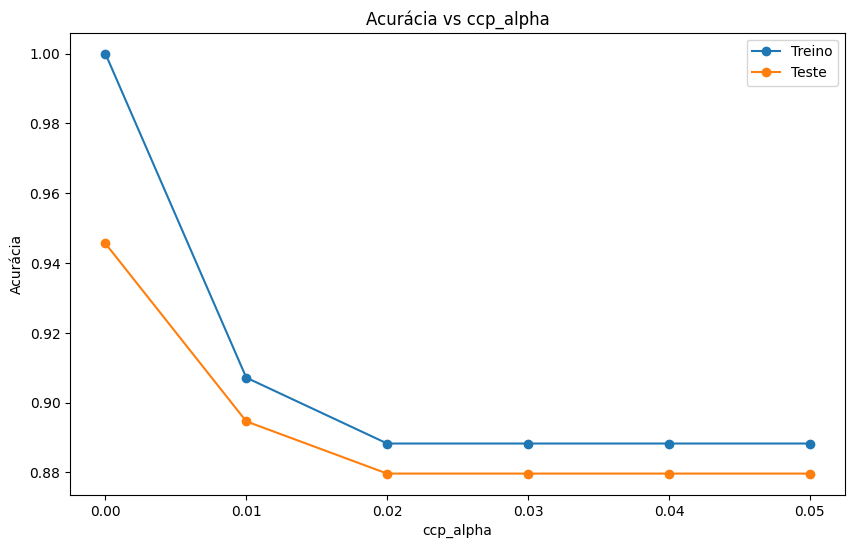

In [100]:
plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, train_accuracies, marker='o', label='Treino')
plt.plot(ccp_alphas, test_accuracies, marker='o', label='Teste')
plt.xlabel('ccp_alpha')
plt.ylabel('Acurácia')
plt.title('Acurácia vs ccp_alpha')
plt.legend()
plt.show()


In [101]:
best_tree_index = np.argmax(test_accuracies)
best_tree = trees[best_tree_index]
best_ccp_alpha = ccp_alphas[best_tree_index]
print(f'Melhor árvore: ccp_alpha = {best_ccp_alpha}, Acurácia no teste = {test_accuracies[best_tree_index]}')


Melhor árvore: ccp_alpha = 0.0, Acurácia no teste = 0.9456152277362339


In [ ]:
# Carregar dados de teste
file_path_X_test = "/content/X_test.txt"
file_path_y_test = "/content/y_test.txt"

X_test, y_test = load_data(file_path_X_test, file_path_subject_test, file_path_features, file_path_y_test)


In [105]:
# Criar uma lista para armazenar as acurácias
accuracies = []

# Iterar sobre as árvores
for tree in trees:
    # Calcular a acurácia na base de validação
    accuracy = tree.score(X_val, y_val)

    # Adicionar a acurácia à lista
    accuracies.append(accuracy)

# Encontrar o índice da árvore com a melhor acurácia
best_tree_index = np.argmax(accuracies)

# Obter a melhor árvore
best_tree = trees[best_tree_index]

# Calcular a acurácia na base de teste usando a melhor árvore
best_accuracy_on_test = best_tree.score(X_test, y_test)

print(f'Melhor acurácia na base de teste: {best_accuracy_on_test}')


Melhor acurácia na base de teste: 0.8449270444519851


In [107]:
# Calcular a acurácia na base de teste usando a melhor árvore
best_accuracy_on_test = best_tree.score(X_test, y_test)

# Imprimir as três variáveis e o resultado
print(f'Melhor árvore: {best_tree}')
print(f'Melhor ccp_alpha: {best_ccp_alpha}')
print(f'Melhor acurácia na base de teste: {best_accuracy_on_test}')


Melhor árvore: DecisionTreeClassifier(random_state=42)
Melhor ccp_alpha: 0.0
Melhor acurácia na base de teste: 0.8449270444519851
